In [110]:
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import numpy as np

In [111]:
df = pd.read_csv('bank-full.csv', sep = ';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Employment status vs term deposit

In [112]:
df['job'].nunique()

12

In [113]:
employment_dist = df.groupby('job', as_index = False)['y'].agg({'job_count': 'count'})

In [114]:
employment_dist.head()

,job,job_count
0,admin.,5171
1,blue-collar,9732
2,entrepreneur,1487
3,housemaid,1240
4,management,9458


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

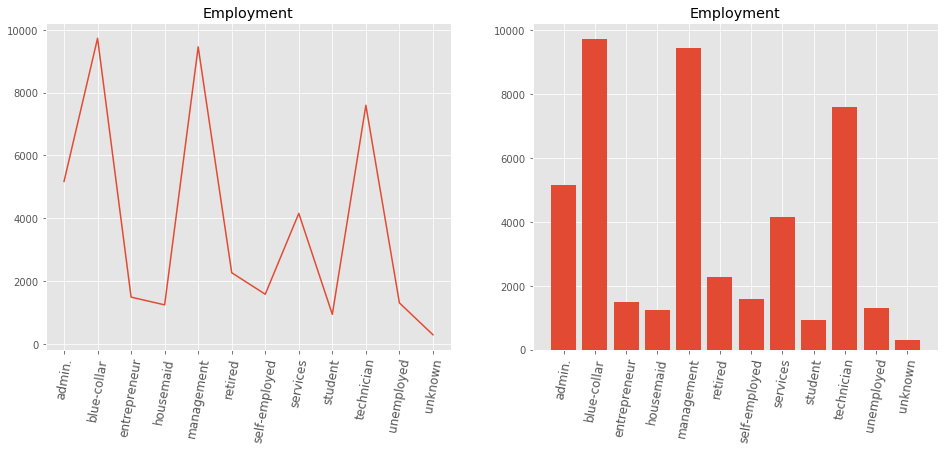

In [115]:
plt.figure(figsize = (16,6))
plt.subplot(1,2,1)
plt.plot('job', 'job_count', data = employment_dist)
plt.title('Employment')
plt.xticks(rotation = 80, size = 12)


plt.subplot(1,2,2)
plt.bar('job', 'job_count', data = employment_dist)
plt.title('Employment')
plt.xticks(rotation = 80, size = 12)

In [116]:
prop = df.groupby(['job', 'y'], as_index = False)['y'].agg({'total_count': 'count'})
prop.head()

,job,y,total_count
0,admin.,no,4540
1,admin.,yes,631
2,blue-collar,no,9024
3,blue-collar,yes,708
4,entrepreneur,no,1364


In [117]:
merged = pd.merge(employment_dist, prop, on = 'job')
merged.head()

,job,job_count,y,total_count
0,admin.,5171,no,4540
1,admin.,5171,yes,631
2,blue-collar,9732,no,9024
3,blue-collar,9732,yes,708
4,entrepreneur,1487,no,1364


In [118]:
merged['proportion'] = (merged['total_count'] / merged['job_count']) * 100

In [119]:
merged.head()

,job,job_count,y,total_count,proportion
0,admin.,5171,no,4540,87.797331
1,admin.,5171,yes,631,12.202669
2,blue-collar,9732,no,9024,92.725031
3,blue-collar,9732,yes,708,7.274969
4,entrepreneur,1487,no,1364,91.728312


In [120]:
yes = merged[merged['y'] == 'yes']
no = merged[merged['y'] == 'no']

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

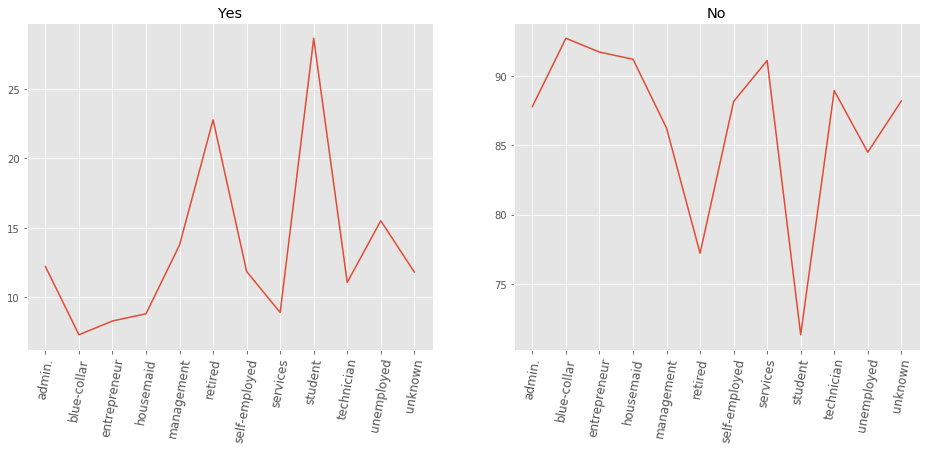

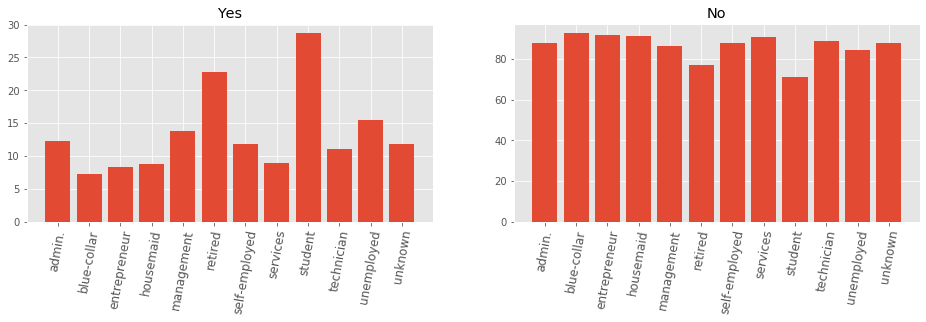

In [121]:
plt.figure(figsize = (16,6))
plt.subplot(1,2,1)
plt.plot('job', 'proportion', data = yes)
plt.title('Yes')
plt.xticks(rotation = 80, size = 12)

plt.subplot(1,2,2)
plt.plot('job', 'proportion', data = no)
plt.title('No')
plt.xticks(rotation = 80, size = 12)


plt.figure(figsize = (16,8))
plt.subplot(2,2,1)
plt.bar('job', 'proportion', data = yes)
plt.title('Yes')
plt.xticks(rotation = 80, size = 12)

plt.subplot(2,2,2)
plt.bar('job', 'proportion', data = no)
plt.title('No')
plt.xticks(rotation = 80, size = 12)


In [122]:
merged.head()

,job,job_count,y,total_count,proportion
0,admin.,5171,no,4540,87.797331
1,admin.,5171,yes,631,12.202669
2,blue-collar,9732,no,9024,92.725031
3,blue-collar,9732,yes,708,7.274969
4,entrepreneur,1487,no,1364,91.728312


In [123]:
yes.head(2)

,job,job_count,y,total_count,proportion
1,admin.,5171,yes,631,12.202669
3,blue-collar,9732,yes,708,7.274969


In [124]:
labels = list(merged['job'].unique())
len(labels)

12

In [125]:
list_yes = list(yes['proportion'])
len(list_yes)

12

In [126]:
no_list = list(no['proportion'])
len(no_list)

12

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

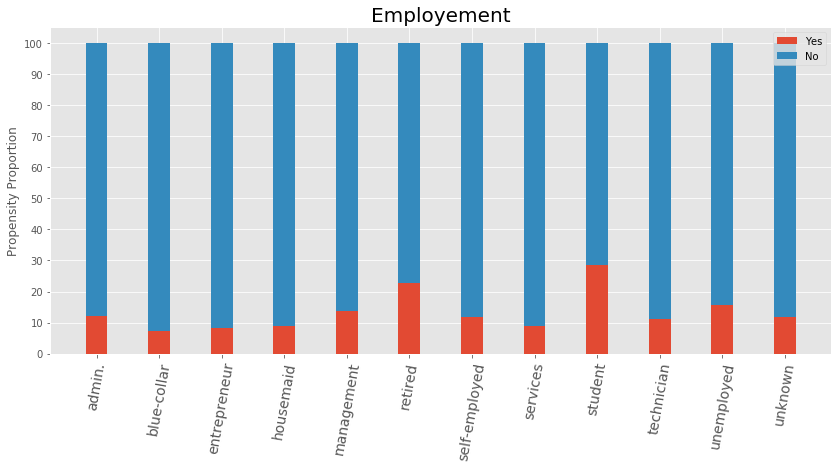

In [127]:
xlabels = len(labels)
ind = np.arange(xlabels)
width = 0.35

plt.figure(figsize = (14, 6))
p1 = plt.bar(ind, list_yes, width = width)
p2 = plt.bar(ind, no_list, width = width, bottom= list_yes)
plt.ylabel('Propensity Proportion')
plt.title('Employement', size = 20)
plt.xticks(ind, labels, size = 14)
plt.yticks(np.arange(0, 101, 10))

plt.legend((p1[0], p2[0]), ('Yes', 'No'))

plt.xticks(rotation = 80)

Text(0.5, 1.0, 'Employement')

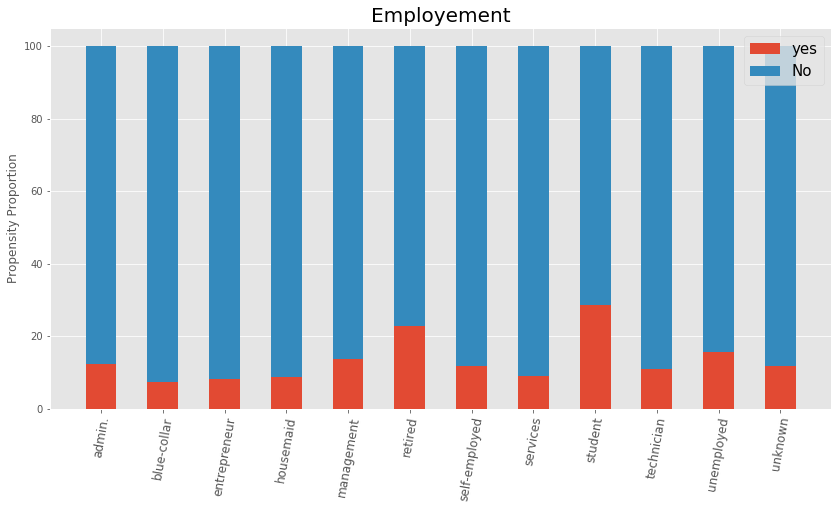

In [128]:
# fig, ax = plt.subplots()
plt.figure(figsize = (14, 7))

plt.bar(labels, list_yes, width = 0.5, label = 'yes')
plt.bar(labels, no_list, width = 0.5, bottom = list_yes, label = 'No')
plt.legend(fontsize = 15)
plt.ylabel('Propensity Proportion')
plt.xticks(rotation = 80, size = 12)
plt.title('Employement', size = 20)


In [130]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
